In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('VLagun_Total_Basins_DT.csv')

In [179]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,Eastern
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,Eastern
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,Eastern
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,Eastern
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,Eastern


In [180]:
df.Basin = [1 if i == 'Western' else 0 for i in df.Basin]

In [181]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,0
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,0
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,0
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,0


In [182]:
X = df.drop('Basin', axis=1)
y = df['Basin']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'#Training data points: {X_train.shape[0]}')
print(f'#Testing data points: {X_test.shape[0]}')
print(f'#Class: {np.unique(y)}')

#Training data points: 108
#Testing data points: 47
#Class: [0 1]


In [184]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [185]:
print(f'Test data:')
print(f'Misclassified samples: {(y_test != y_pred).sum()}')
print(f'Test dataset Accuracy (tree): {(y_test == y_pred).sum() / y_test.shape[0]:2f}')

Test data:
Misclassified samples: 13
Test dataset Accuracy (tree): 0.723404


In [186]:
print(f'Train data:')
print(f'Misclassified samples: {(y_train != y_pred_train).sum()}')
print(f'Test dataset Accuracy (tree): {(y_train == y_pred_train).sum() / y_train.shape[0]:2f}')

Train data:
Misclassified samples: 21
Test dataset Accuracy (tree): 0.805556


In [187]:
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns.values)

In [188]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2,
                       random_state=1)

In [189]:
y_pred = forest.predict(X_test)
print(f'Test dataset Accuracy (forest): {accuracy_score(y_test, y_pred):2f}')

Test dataset Accuracy (forest): 0.765957


In [190]:
y_pred_train = forest.predict(X_train)
print(f'Train dataset Accuracy (forest): {accuracy_score(y_train, y_pred_train):2f}')

Train dataset Accuracy (forest): 1.000000


In [191]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f"{f + 1})":{4}} {X.columns.values[indices[f]]:{40}} {importances[indices[f]]:2f}')

1)   Nauplii Cyclopoida                       0.087723
2)   Cyclops sp.                              0.072056
3)   Depth                                    0.068339
4)   DON                                      0.053796
5)   PSU                                      0.042186
6)   DOP                                      0.037714
7)   O2                                       0.036068
8)   DOC                                      0.035916
9)   Cyanobacteria                            0.031511
10)  Acartia tonsa                            0.029091
11)  TN/TP                                    0.027812
12)  Keratella cochlearis cochlearis          0.027801
13)  temp.                                    0.027305
14)  SS                                       0.026483
15)  PP                                       0.024106
16)  SRP                                      0.023878
17)  PN                                       0.023749
18)  Diatomophyceae                           0.023105
19)  Chlor

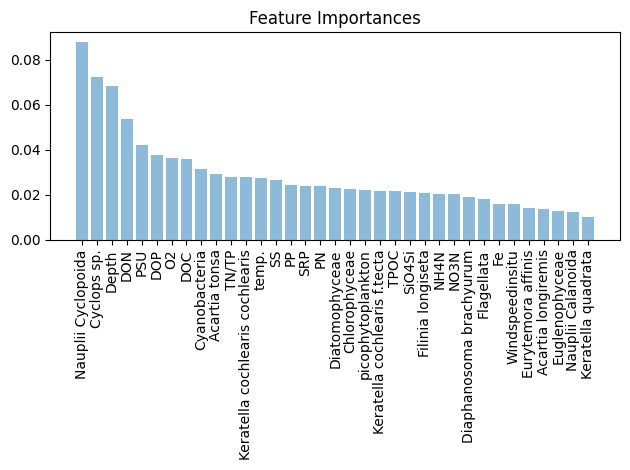

In [192]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center', alpha=0.5)
plt.xticks(range(X_train.shape[1]), X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()

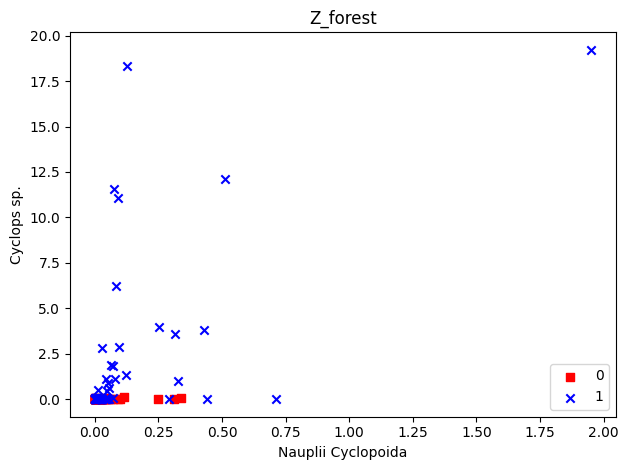

In [193]:
Z_forest = X[['Nauplii Cyclopoida', 'Cyclops sp.']].values
colors = ['r', 'b', 'g', 'k']
markers = ['s', 'x', 'o', '^']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values == l, 0], Z_forest[y.values == l, 1], c=c, label=l, marker=m)
plt.title('Z_forest')
plt.xlabel('Nauplii Cyclopoida')
plt.ylabel('Cyclops sp.')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('fig-forest-z.png', dpi=300)
plt.show()

In [194]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(Z_forest, y, test_size=0.3, random_state=0)
tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
y_forest_pred_train = tree_forest.predict(Z_forest_train)

In [195]:
print(f'Test data:')
print(f'Misclassified samples: {(y_forest_test != y_forest_pred).sum()}')
print(f'Test dataset Accuracy (tree): {(y_forest_test == y_forest_pred).sum() / y_forest_test.shape[0]:2f}')

Test data:
Misclassified samples: 15
Test dataset Accuracy (tree): 0.680851


In [196]:
print(f'Train data:')
print(f'Misclassified samples: {(y_forest_train != y_forest_pred_train).sum()}')
print(f'Test dataset Accuracy (tree): {(y_forest_train == y_forest_pred_train).sum() / y_forest_train.shape[0]:2f}')

Train data:
Misclassified samples: 22
Test dataset Accuracy (tree): 0.796296


In [197]:
sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
    print(f'{f"{f + 1})":{4}} {X.columns.values[indices[f]]:{40}} {importances[indices[f]]:2f}')

1)   Nauplii Cyclopoida                       0.087723
2)   Cyclops sp.                              0.072056
3)   Depth                                    0.068339
4)   DON                                      0.053796


In [198]:
forest_forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
y_forest_pred_train = forest_forest.predict(Z_forest_train)

In [199]:
print(f'Test data:')
print(f'Misclassified samples: {(y_forest_test != y_forest_pred).sum()}')
print(f'Test dataset Accuracy (tree): {(y_forest_test == y_forest_pred).sum() / y_forest_test.shape[0]:2f}')

Test data:
Misclassified samples: 13
Test dataset Accuracy (tree): 0.723404


In [200]:
print(f'Train data:')
print(f'Misclassified samples: {(y_forest_train != y_forest_pred_train).sum()}')
print(f'Test dataset Accuracy (tree): {(y_forest_train == y_forest_pred_train).sum() / y_forest_train.shape[0]:2f}')

Train data:
Misclassified samples: 2
Test dataset Accuracy (tree): 0.981481


In [201]:
%matplotlib inline
from matplotlib.colors import ListedColormap

In [202]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='c', alpha=1.0, linewidths=1, marker='o', s=55, label='test set', edgecolors='k')

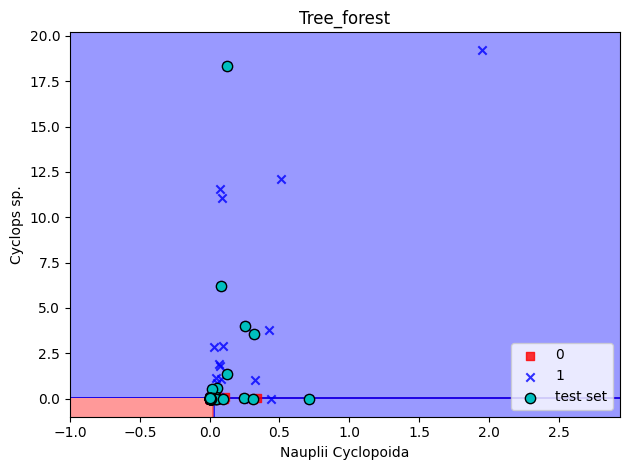

In [203]:
Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=tree_forest,
    test_idx=range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Tree_forest')
plt.xlabel('Nauplii Cyclopoida')
plt.ylabel('Cyclops sp.')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

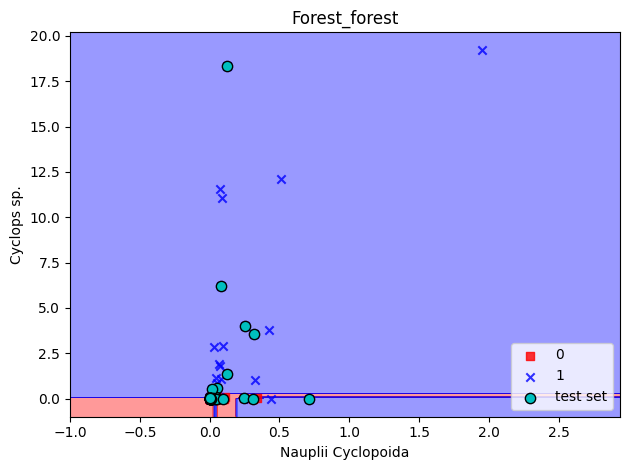

In [204]:
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=forest_forest,
    test_idx = range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Forest_forest')
plt.xlabel('Nauplii Cyclopoida')
plt.ylabel('Cyclops sp.')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()